In [1]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
from pandas import read_csv
import numpy as np

In [2]:
survivalData = read_csv('titanic_train.csv')

In [3]:
survivalData.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [4]:
feature_names = [u'Pclass', u'Sex', u'Age',u'SibSp', u'Parch']
X = survivalData[feature_names].fillna(0).values
X[:, 1] = X[:, 1] == 'male'

In [5]:
survivalData[feature_names+['Survived']]

,Pclass,Sex,Age,SibSp,Parch,Survived
0,3,male,22.0,1,0,0
1,1,female,38.0,1,0,1
2,3,female,26.0,0,0,1
3,1,female,35.0,1,0,1
4,3,male,35.0,0,0,0
5,3,male,NaN,0,0,0
6,1,male,54.0,0,0,0
7,3,male,2.0,3,1,0
8,3,female,27.0,0,2,1
9,2,female,14.0,1,0,1


In [6]:
# Survival count: people traveling in 1st, 2nd and 3rd class

for i in [1,2,3]:
    no, yes = np.bincount(survivalData[survivalData['Pclass'] == i]['Survived'])
    print 'Percentage of non survivors to survivors in class {} is {} : {}'.format(i, no/float(no + yes), yes/float(no + yes))

Percentage of non survivors to survivors in class 1 is 0.37037037037 : 0.62962962963
Percentage of non survivors to survivors in class 2 is 0.527173913043 : 0.472826086957
Percentage of non survivors to survivors in class 3 is 0.757637474542 : 0.242362525458


In [7]:
from sklearn.ensemble import RandomForestClassifier as RF

In [8]:
Y = survivalData['Survived'].values

In [9]:
def show_importance(model, feature_names=feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    for name, importance in zip(feature_names, importances):
        print(name, "=", importance)

    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), np.array(feature_names)[indices])
    plt.show()

(u'Pclass', '=', 0.14421237369936127)
(u'Sex', '=', 0.34171945710174689)
(u'Age', '=', 0.38168743018499368)
(u'SibSp', '=', 0.071525276707919583)
(u'Parch', '=', 0.060855462305978616)


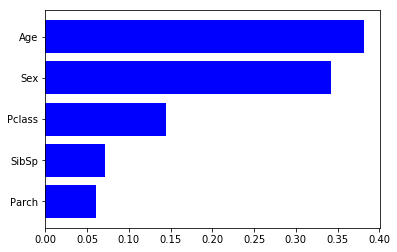

In [10]:
model = RF(n_estimators = 501, n_jobs=-1)

model.fit(X,Y)
show_importance(model)

(u'Pclass', '=', 0.23768096310943393)
(u'Sex', '=', 0.20037753405393147)
(u'Age', '=', 0.43999575870937713)
(u'SibSp', '=', 0.073197034135475292)
(u'Parch', '=', 0.048748709991782248)


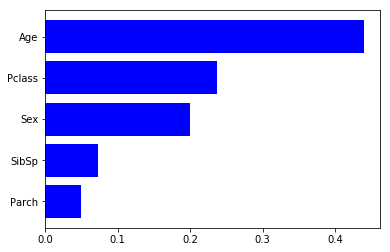

In [11]:
model2 = RF(n_estimators=1)

model2.fit(X,Y)
show_importance(model2)

In [12]:
def prediction_stats(model, x, y):
    predictions = model.predict(x)
    return np.bincount(y==predictions)

In [13]:
prediction_stats(model, X, Y)

array([ 71, 820])

In [14]:
prediction_stats(model2, X, Y)

array([110, 781])

In [15]:
from pandas import Series

In [16]:
model_1_values = model.predict(X)
model_2_values = model2.predict(X)

In [17]:
survivalData['model_1'] = Series(model_1_values, index=survivalData.index)
survivalData['model_2'] = Series(model_2_values, index=survivalData.index)

In [18]:
# Survival count for model 1: people traveling in 1st, 2nd and 3rd class

for i in [1,2,3]:
    no, yes = np.bincount(survivalData[survivalData['Pclass'] == i]['model_1'])
    print 'Percentage of non survivors to survivors in class {} is {} : {}'.format(i, no/float(no + yes), yes/float(no + yes))

Percentage of non survivors to survivors in class 1 is 0.407407407407 : 0.592592592593
Percentage of non survivors to survivors in class 2 is 0.548913043478 : 0.451086956522
Percentage of non survivors to survivors in class 3 is 0.804480651731 : 0.195519348269


In [19]:
# Survival count for model 2: people traveling in 1st, 2nd and 3rd class

for i in [1,2,3]:
    no, yes = np.bincount(survivalData[survivalData['Pclass'] == i]['model_2'])
    print 'Percentage of non survivors to survivors in class {} is {} : {}'.format(i, no/float(no + yes), yes/float(no + yes))

Percentage of non survivors to survivors in class 1 is 0.398148148148 : 0.601851851852
Percentage of non survivors to survivors in class 2 is 0.554347826087 : 0.445652173913
Percentage of non survivors to survivors in class 3 is 0.812627291242 : 0.187372708758


In [20]:
#np.where(survivalData['Pclass'] == 1)# and survivalData['model_1'] == 0)
a = survivalData['model_1'] == 1
b = survivalData['Pclass'] == 2
survivalData[a & b][feature_names+['model_1', 'model_2','Survived']]

,Pclass,Sex,Age,SibSp,Parch,model_1,model_2,Survived
9,2,female,14.00,1,0,1,1,1
15,2,female,55.00,0,0,1,1,1
41,2,female,27.00,1,0,1,0,0
43,2,female,3.00,1,2,1,1,1
53,2,female,29.00,1,0,1,1,1
56,2,female,21.00,0,0,1,1,1
58,2,female,5.00,1,2,1,1,1
66,2,female,29.00,0,0,1,1,1
78,2,male,0.83,0,2,1,1,1
84,2,female,17.00,0,0,1,1,1


In [21]:
survivalData[survivalData['model_1'] == 0][feature_names+['model_1', 'model_2', 'Survived']]

,Pclass,Sex,Age,SibSp,Parch,model_1,model_2,Survived
0,3,male,22.0,1,0,0,1,0
4,3,male,35.0,0,0,0,0,0
5,3,male,NaN,0,0,0,0,0
6,1,male,54.0,0,0,0,0,0
7,3,male,2.0,3,1,0,0,0
12,3,male,20.0,0,0,0,0,0
13,3,male,39.0,1,5,0,0,0
14,3,female,14.0,0,0,0,0,0
16,3,male,2.0,4,1,0,0,0
17,2,male,NaN,0,0,0,0,1


In [22]:
from scipy.stats import skew

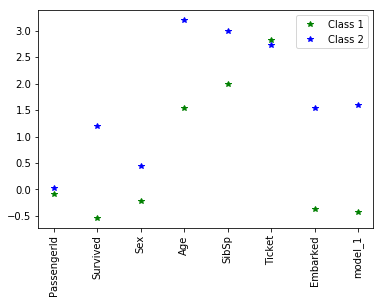

In [41]:
condition = survivalData['Pclass'] == 1

X = survivalData.loc[:, survivalData.columns != 'Pclass'][condition].fillna(0).values
columns = survivalData.columns
class_1_skew = []
for i in range(X.shape[1]):
    try:
        class_1_skew.append(skew(X[:,i]))
    except TypeError:
        continue

condition = survivalData['Pclass'] == 3

X = survivalData.loc[:, survivalData.columns != 'Pclass'][condition].fillna(0).values
columns = survivalData.columns
numeric_labels = []
class_3_skew = []
for i in range(X.shape[1]):
    try:
        class_3_skew.append(skew(X[:,i]))
        numeric_labels.append(columns[i])
    except TypeError:
        continue

plt.plot(class_1_skew, 'g*', label="Class 1")
plt.plot(class_3_skew, 'b*', label="Class 2")
plt.legend()
plt.xticks(range(len(numeric_labels)), numeric_labels, rotation='vertical')
plt.show()